In [56]:
# Import required libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [57]:
tf.__version__

'2.8.0'

In [58]:
car_price = pd.read_csv("/content/drive/MyDrive/Datasets/CarPrice_Assignment.csv", index_col = 0)
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
car_price_one_hot = pd.get_dummies(car_price)

In [60]:
car_price_one_hot

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0


In [61]:
car_price_one_hot.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
x = car_price_one_hot.drop("price", axis = 1)
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0


In [64]:
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
y = car_price["price"]
y

car_ID
1      13495.0
2      16500.0
3      16500.0
4      13950.0
5      17450.0
        ...   
201    16845.0
202    19045.0
203    21485.0
204    22470.0
205    22625.0
Name: price, Length: 205, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)
len(x), len(x_train), len(x_test), len(y_train), len(y_test)

(205, 164, 41, 164, 41)

In [67]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
car_price_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
car_price_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"]
                        )
# 3. Fit the model
car_price_model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 12461.0508 - mae: 12461.0508
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 12265.2939 - mae: 12265.2939
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 12067.2500 - mae: 12067.2500
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 11864.8359 - mae: 11864.8359
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 11656.7910 - mae: 11656.7910
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 11442.6172 - mae: 11442.6172
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 11219.8691 - mae: 11219.8691
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 10989.7725 - mae: 10989.7725
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 10749.0986 - mae: 10749.0986
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 10498.7285 - mae: 10498.7285

In [14]:
car_price_model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 4856.6182 - mae: 4856.6182


[4856.6181640625, 4856.6181640625]

In [15]:
y_train.median(),y_train.mean()

(10646.5, 13223.414634146342)

In [80]:
# Creating another model with an extra layer

# set random seed
tf.random.set_seed(42)

# Create the model
car_price_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
car_price_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the mdoel
car_price_model_1.fit(x_train,y_train, epochs = 500, verbose = 1)

Epoch 1/500
6/6 [==============================] - 1s 5ms/step - loss: 13324.7715 - mae: 13324.7715
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 12137.0273 - mae: 12137.0273
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 10885.9941 - mae: 10885.9941
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 9443.3086 - mae: 9443.3086
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 7701.0015 - mae: 7701.0015
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 5930.1626 - mae: 5930.1626
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 5197.8057 - mae: 5197.8057
Epoch 8/500
6/6 [==============================] - 0s 8ms/step - loss: 5105.5640 - mae: 5105.5640
Epoch 9/500
6/6 [==============================] - 0s 5ms/step - loss: 5074.3306 - mae: 5074.3306
Epoch 10/500
6/6 [==============================] - 0s 6ms/step - loss: 5016.6758 - mae: 5016.6758
Epoch 11/500


In [82]:
!nvidia-smi

Sat Mar 12 15:06:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    77W / 149W |    207MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [81]:
car_price_model_1.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 2916.5667 - mae: 2916.5667


[2916.566650390625, 2916.566650390625]

In [18]:
car_price_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               20000     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 21,021
Trainable params: 21,021
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Now creating model with more epochs

# set random seed
tf.random.set_seed(42)

# 1. Creatin the model
car_price_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
car_price_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = car_price_model_2.fit(x_train, y_train, epochs = 200)

Epoch 1/200
6/6 [==============================] - 0s 7ms/step - loss: 11313.0117 - mae: 11313.0117
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 9720.5508 - mae: 9720.5508
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 8027.7441 - mae: 8027.7441
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 6426.5806 - mae: 6426.5806
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 5423.6978 - mae: 5423.6978
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 5122.4053 - mae: 5122.4053
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 5071.7183 - mae: 5071.7183
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 5059.2036 - mae: 5059.2036
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 5019.8608 - mae: 5019.8608
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 4983.0132 - mae: 4983.0132
Epoch 11/200
6/6 

In [55]:
car_price_model_2.evaluate(x_test,y_test)

ValueError: ignored

In [21]:
car_price_model_1.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 3066.0830 - mae: 3066.0830


[3066.0830078125, 3066.0830078125]

Text(0.5, 0, 'epochs')

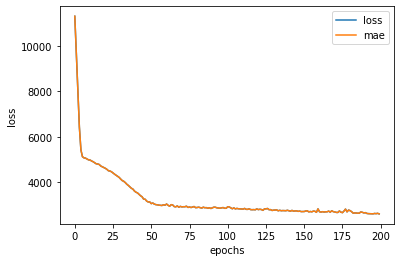

In [22]:
from matplotlib import pyplot, pylab
import pandas as pd
# plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
pylab.ylabel('loss')
pylab.xlabel('epochs')

In [23]:
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


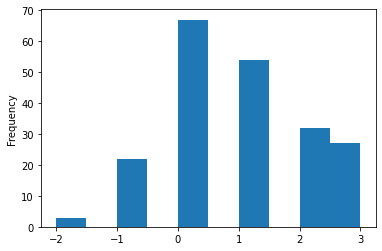

In [24]:
x["symboling"].plot(kind = "hist")

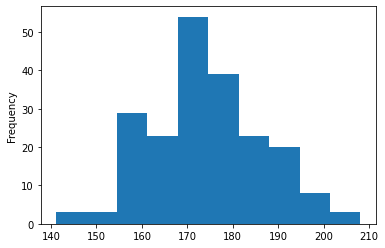

In [25]:
x["carlength"].plot(kind = "hist")

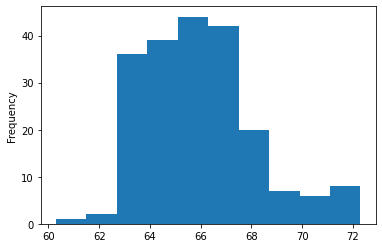

In [26]:
x["carwidth"].plot(kind = "hist")

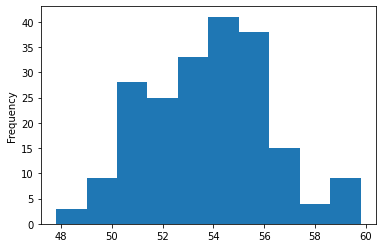

In [27]:
x["carheight"].plot(kind = "hist")

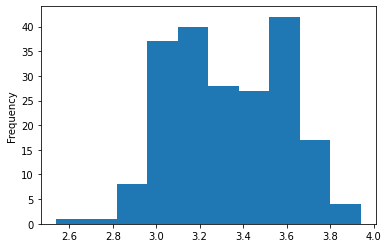

In [28]:
x["boreratio"].plot(kind = "hist")

In [29]:
y

car_ID
1      13495.0
2      16500.0
3      16500.0
4      13950.0
5      17450.0
        ...   
201    16845.0
202    19045.0
203    21485.0
204    22470.0
205    22625.0
Name: price, Length: 205, dtype: float64

In [30]:
car_price

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["symboling", "wheelbase", "carlength", "carheight", "enginesize", "carwidth", "curbweight", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]),
    (OneHotEncoder(handle_unknown="ignore"), ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel","enginelocation", "enginetype","cylindernumber", "fuelsystem", ])
)

# Create x & y
x = car_price.drop("price", axis =1)
y = car_price["price"]

# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Fit the column transormer to our training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [32]:
import numpy as np
x_train.loc[1]

symboling                            3
CarName             alfa-romero giulia
fueltype                           gas
aspiration                         std
doornumber                         two
carbody                    convertible
drivewheel                         rwd
enginelocation                   front
wheelbase                         88.6
carlength                        168.8
carwidth                          64.1
carheight                         48.8
curbweight                        2548
enginetype                        dohc
cylindernumber                    four
enginesize                         130
fuelsystem                        mpfi
boreratio                         3.47
stroke                            2.68
compressionratio                   9.0
horsepower                         111
peakrpm                           5000
citympg                             21
highwaympg                          27
Name: 1, dtype: object

In [36]:
x_train_normal = x_train_normal.toarray()

In [41]:
x_train_normal[0]

array([0.4       , 0.63103448, 0.52413793, 0.55      , 0.25      ,
       0.40952381, 0.39207833, 0.63571429, 0.74761905, 0.9375    ,
       0.08474576, 0.02040816, 0.5625    , 0.67647059, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
x_train.shape, x_train_normal.shape

((164, 24), (164, 175))

In [51]:
# Let's create model

# 1. Create the model
car_price_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
car_price_model_3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

# 3. Fit the model
car_price_model_3.fit(x_train_normal, y_train, epochs = 250)

Epoch 1/250
6/6 [==============================] - 24s 4ms/step - loss: 13221.6895 - mae: 13221.6895
Epoch 2/250
6/6 [==============================] - 0s 4ms/step - loss: 13219.3076 - mae: 13219.3076
Epoch 3/250
6/6 [==============================] - 0s 4ms/step - loss: 13216.2285 - mae: 13216.2285
Epoch 4/250
6/6 [==============================] - 0s 5ms/step - loss: 13212.0020 - mae: 13212.0020
Epoch 5/250
6/6 [==============================] - 0s 4ms/step - loss: 13206.1689 - mae: 13206.1689
Epoch 6/250
6/6 [==============================] - 0s 4ms/step - loss: 13198.2383 - mae: 13198.2383
Epoch 7/250
6/6 [==============================] - 0s 4ms/step - loss: 13187.6143 - mae: 13187.6143
Epoch 8/250
6/6 [==============================] - 0s 4ms/step - loss: 13173.7939 - mae: 13173.7939
Epoch 9/250
6/6 [==============================] - 0s 4ms/step - loss: 13155.9951 - mae: 13155.9951
Epoch 10/250
6/6 [==============================] - 0s 4ms/step - loss: 13133.5703 - mae: 13133.570

In [49]:
#x_test_normal = x_test_normal.toarray()

In [52]:
car_price_model_3.evaluate(x_test_normal, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2825.9451 - mae: 2825.9451


[2825.945068359375, 2825.945068359375]